#Install Kaggle API

In [1]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 235kB 6.9MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


# Give Authentication

In [4]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


# Make sure kaggle.json is in the correct directory


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

# Download dataset to location

In [9]:
!kaggle competitions download -c f2018-hand-drawn-pictures -p /content/kaggle

  0% 0.00/121k [00:00<?, ?B/s]
100% 121k/121k [00:00<00:00, 41.4MB/s]
  0% 0.00/121k [00:00<?, ?B/s]
100% 121k/121k [00:00<00:00, 60.9MB/s]
 69% 25.0M/36.1M [00:00<00:00, 84.7MB/s]
100% 36.1M/36.1M [00:00<00:00, 135MB/s] 
 80% 29.0M/36.1M [00:00<00:00, 55.1MB/s]
100% 36.1M/36.1M [00:00<00:00, 147MB/s] 


In [10]:
!ls /content/kaggle

sample_submission.csv  train_images.npy.zip
test_images.npy.zip    train_labels.csv


# Unzip the dataset

In [11]:
!unzip /content/kaggle/test_images.npy.zip 


Archive:  /content/kaggle/test_images.npy.zip
  inflating: test_images.npy         
sample_submission.csv  train_images.npy.zip
test_images.npy.zip    train_labels.csv


In [12]:
!ls 

adc.json  kaggle  sample_data  test_images.npy


# Example for getting the images


In [13]:
import numpy as np
images = np.load('test_images.npy',encoding='latin1')
images.shape

(10000, 2)

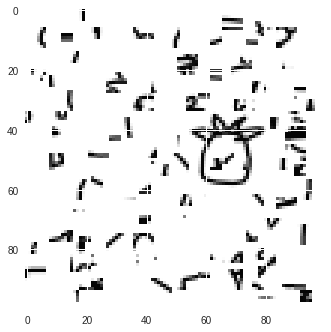

In [14]:
import matplotlib.pyplot as plt
image1 = (images[0][1]).reshape(100,100)
plt.imshow(image1)